<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Netflix_EDA_Cleaning_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Text(0.5, 1.0, "Show's distribution")

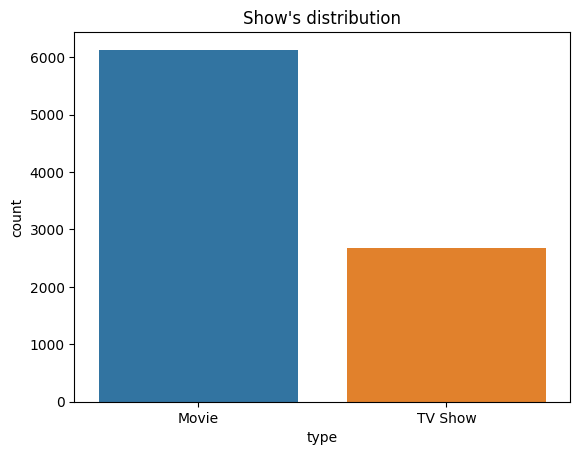

In [ ]:
sns.countplot(x = df['type'])
plt.title("Show's distribution")

Text(0, 0.5, 'Count')

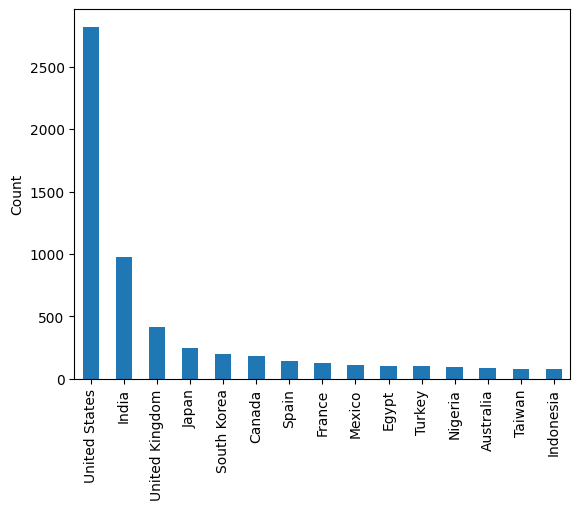

In [ ]:
df['country'].value_counts().head(15).plot.bar()
plt.ylabel('Count')

Text(0, 0.5, 'Count')

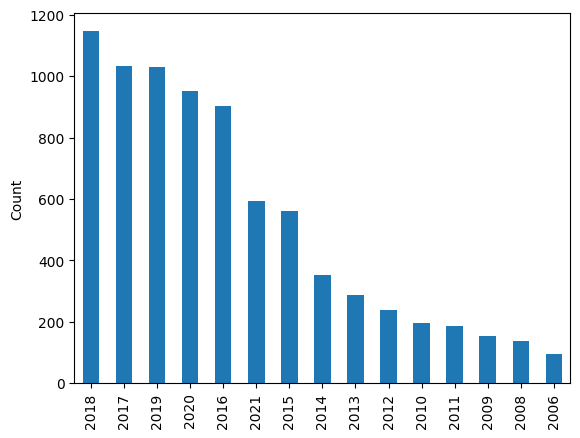

In [ ]:
df['release_year'].value_counts().head(15).plot.bar()
plt.ylabel('Count')

Text(0.5, 1.0, 'Rating')

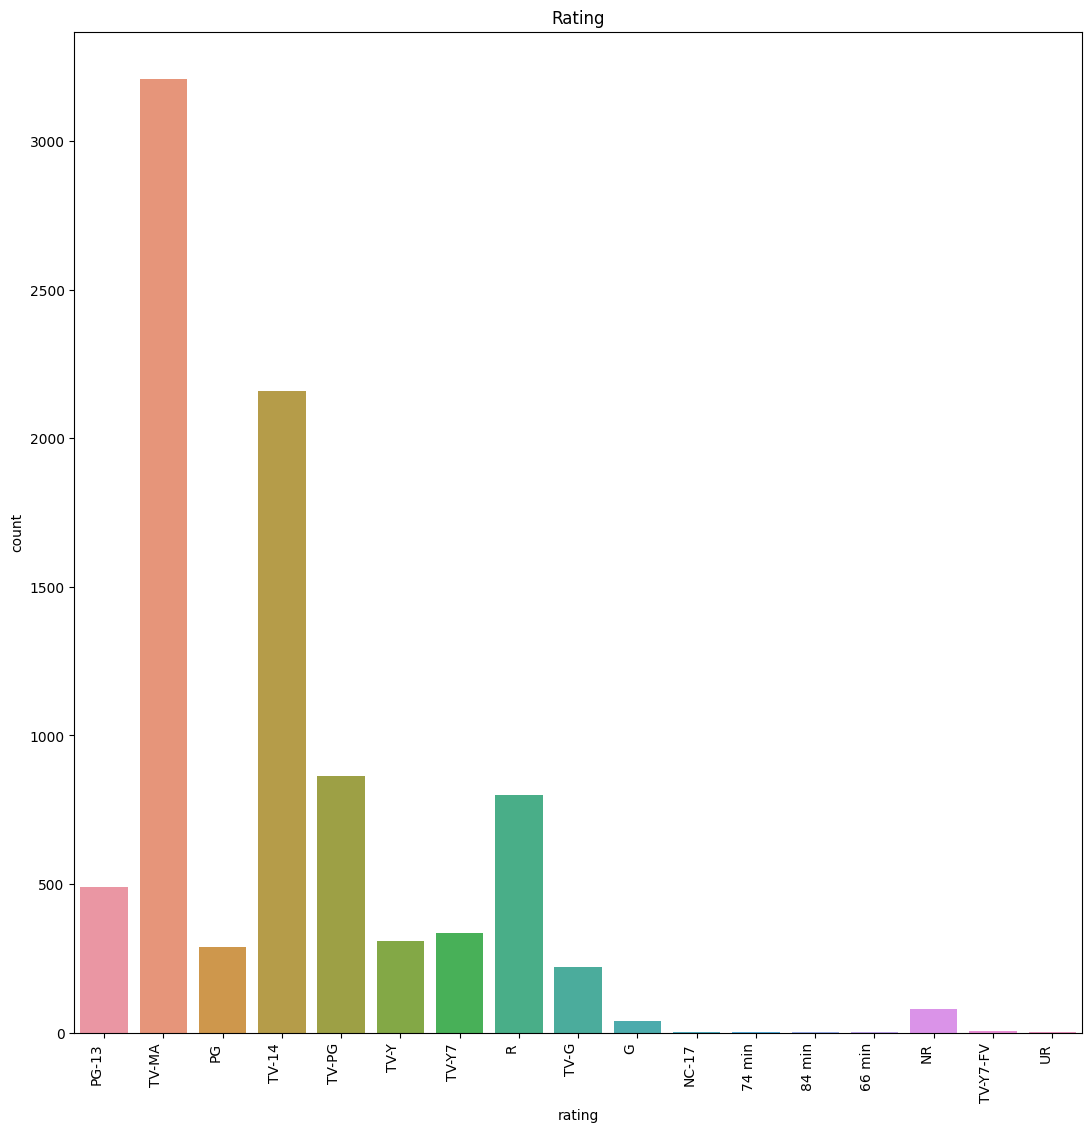

In [ ]:
sns.countplot(x = df['rating'])
sns.countplot(x = df['rating']).set_xticklabels(sns.countplot(x = df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

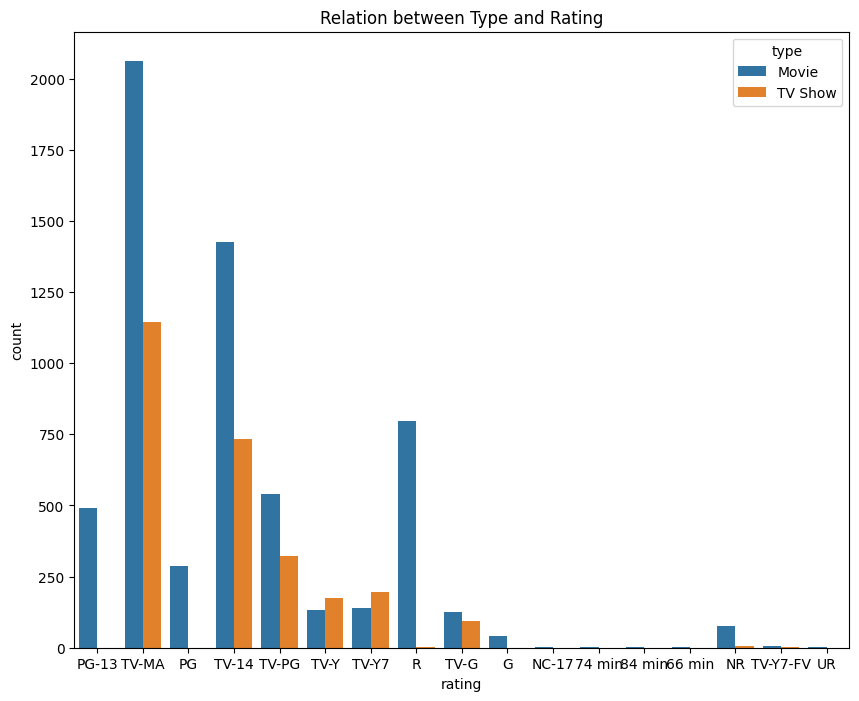

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

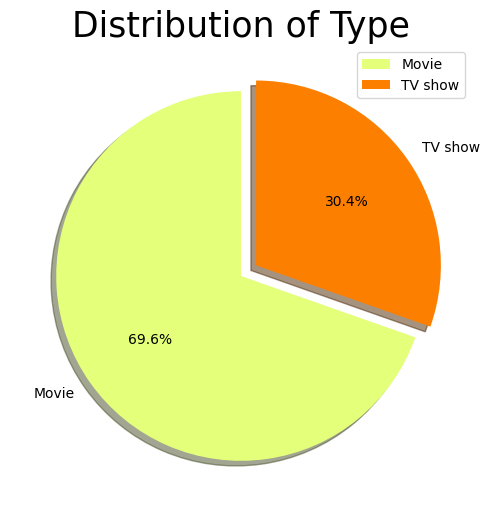

In [ ]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

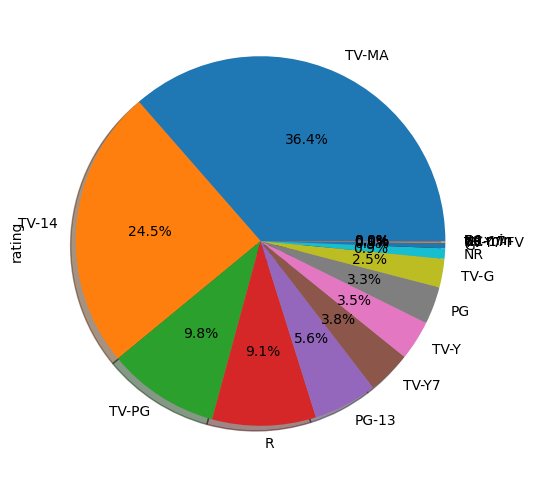

In [ ]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.show()

In [ ]:
df['country'] = df['country'].replace({np.nan: 'Unknown'})

In [ ]:
df['director'] = df['director'].replace({np.nan: 'Unknown'})

In [ ]:
from wordcloud import WordCloud

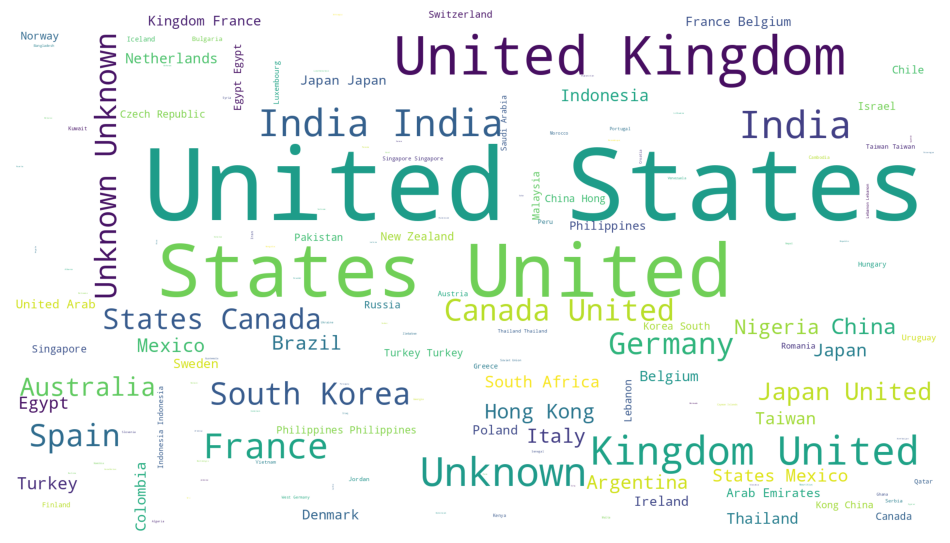

In [ ]:
plt.subplots(figsize=(12,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

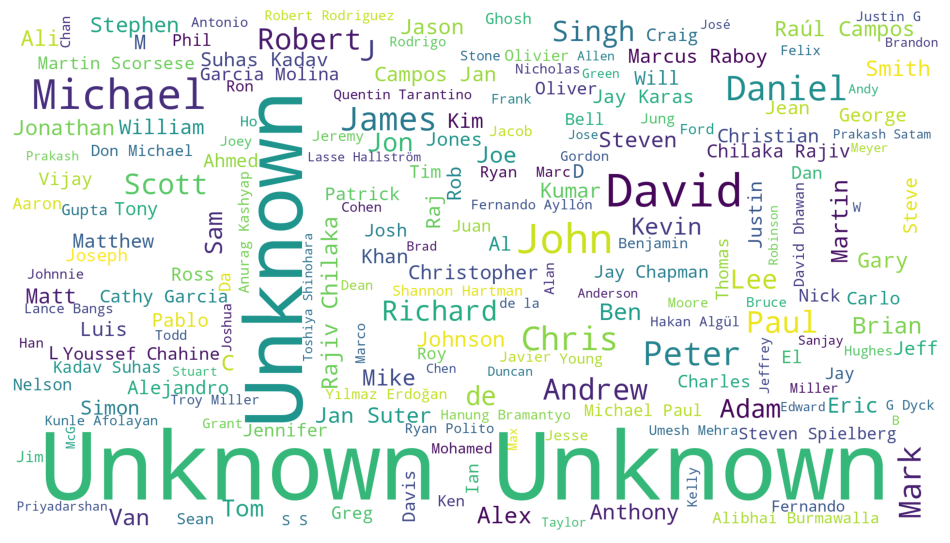

In [ ]:
plt.subplots(figsize=(12,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

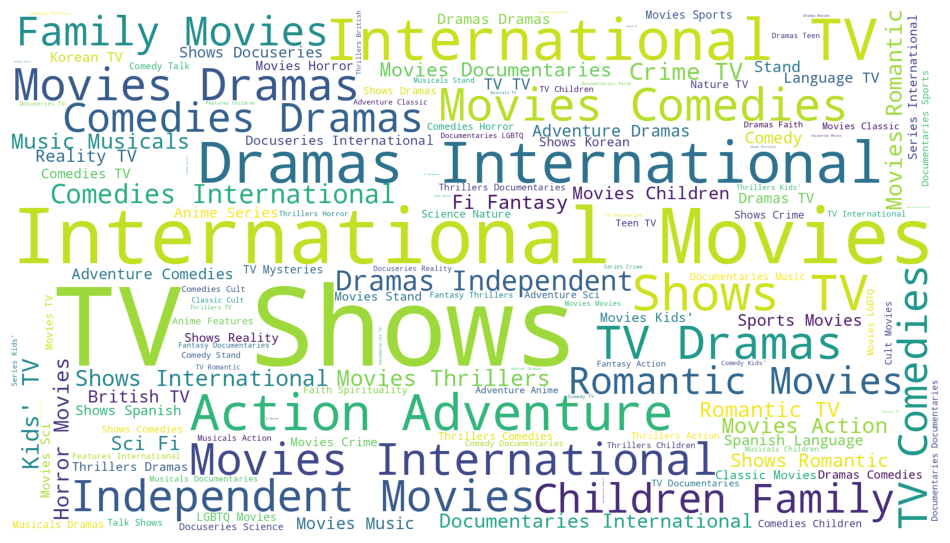

In [ ]:
plt.subplots(figsize=(12,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()